In [ ]:
#https://towardsdatascience.com/how-to-use-r-in-google-colab-b6e02d736497

In [ ]:
if (!require("igraph")) install.packages("igraph")
library ("igraph")

Loading required package: igraph

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘igraph’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




###1.Structural properties of the Facebook network

Report the number of nodes and number of edges of the Facebook network

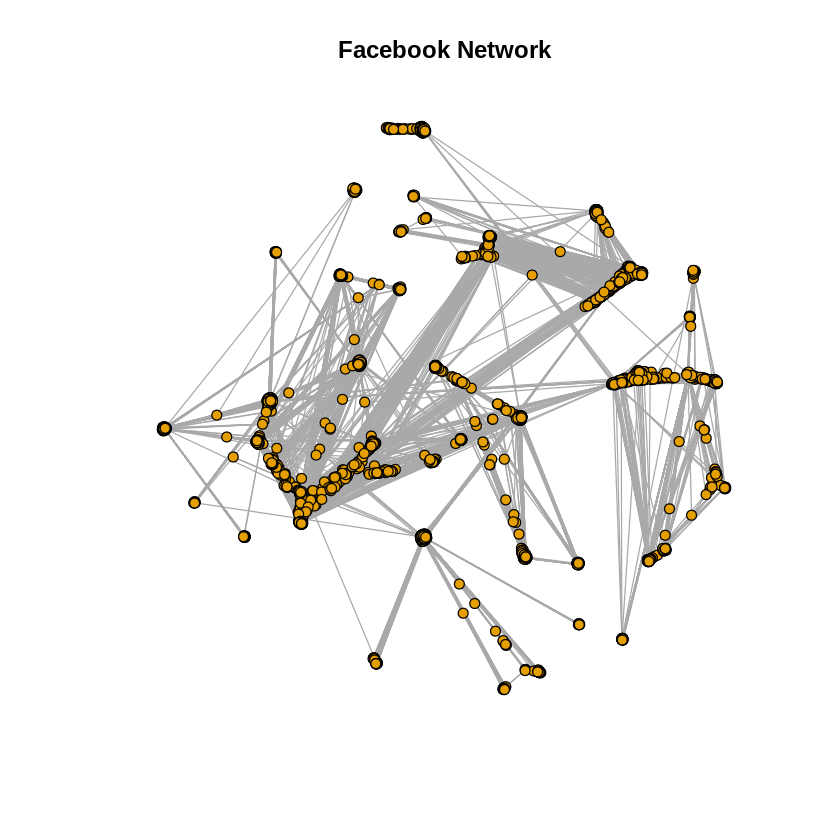

In [ ]:
fbgraph <- read.graph("facebook_combined.txt",directed=F)
plot(fbgraph, vertex.size=3.5, vertex.label=NA, main="Facebook Network")

In [ ]:
vcount(fbgraph)#node
ecount(fbgraph)#edge

[1] 4039

[1] 88234

Is the Facebook network connected? If not, find the giant connected component
(GCC) of the network and report the size of the GCC.

In [ ]:
is.connected(fbgraph)

[1] TRUE

QUESTION 2: Find the diameter of the network. If the network is not connected, then find the
diameter of the GCC.

In [ ]:
diameter(fbgraph)

[1] 8

QUESTION 3: Plot the degree distribution of the facebook network and report the average degree.

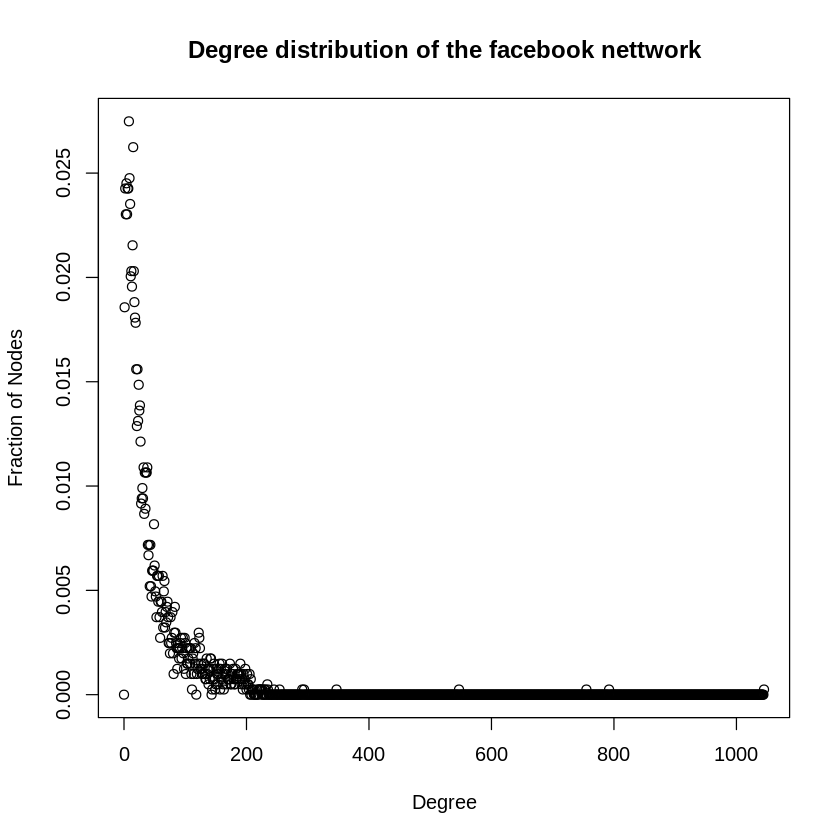

In [ ]:
frequency <- degree.distribution(fbgraph)
degree <- seq_along(degree.distribution(fbgraph)) - 1
plot(degree, frequency, xlab="Degree", ylab="Fraction of Nodes", main ="Degree distribution of the facebook nettwork")

In [ ]:
mean(degree(fbgraph))

[1] 43.69101

QUESTION 4: Plot the degree distribution of Question 3 in a log-log scale. Try to fit a line to the plot and estimate the slope of the line.

The slope of the plot is -1.180164

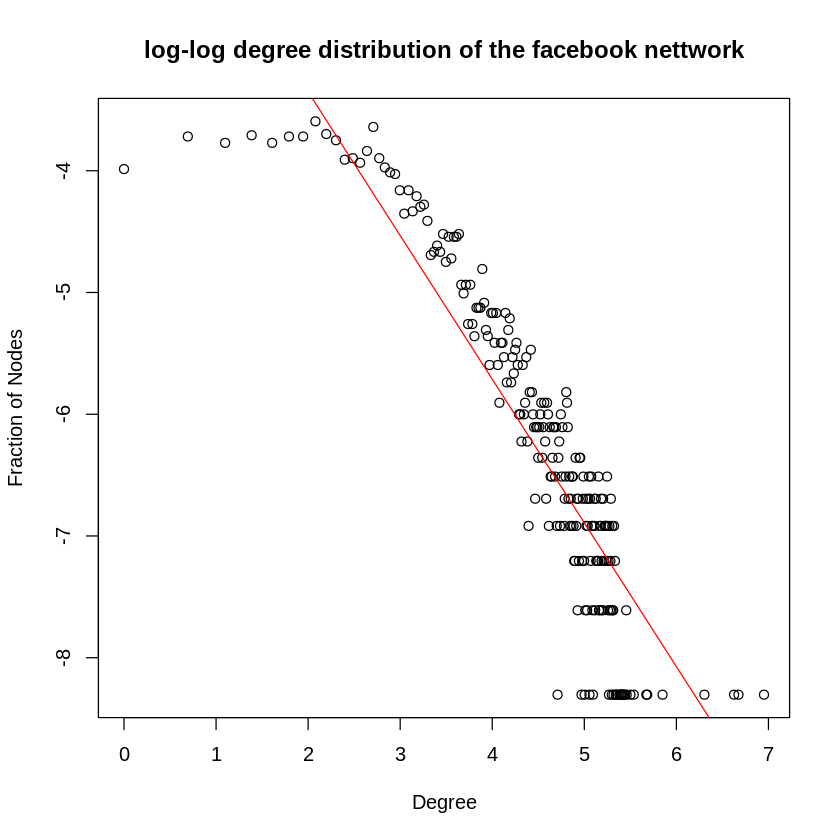

In [ ]:
log_fre <- log(frequency)
log_deg <- log(degree)

plot(log_deg, log_fre, xlab="Degree", ylab="Fraction of Nodes", main ="log-log degree distribution of the facebook nettwork")
# here we need to eliminat some invalid value in distri
invalid_idx <- is.infinite(log_fre)
# create a data frame for linear regression
ndata <- data.frame(x=log_deg, y=log_fre)[!invalid_idx,]
# linear regression
model <- lm(y~x, ndata)
abline(model, col='red')
slope <- coef(model)[2]
cat("The slope of the plot is", slope)

###3.Core node’s personalized network

QUESTION 8: How many core nodes are there in the Facebook network. What is the average degree of the core nodes?

In [ ]:
# Calculate the degree of each node
node_degrees <- degree(fbgraph)

# Identify the core nodes
core_nodes <- which(node_degrees > 200)

# Get the number of core nodes
num_core_nodes <- length(core_nodes)

# Print the core nodes and the number of them
print(paste("Core Nodes:", paste(core_nodes, collapse=", ")))
print(paste("Number of Core Nodes:", num_core_nodes))

[1] "Core Nodes: 1, 108, 349, 484, 1087, 1200, 1353, 1432, 1585, 1590, 1664, 1685, 1731, 1747, 1769, 1801, 1828, 1889, 1913, 1942, 1986, 1994, 2048, 2079, 2124, 2143, 2207, 2219, 2230, 2234, 2241, 2267, 2348, 2411, 2465, 2508, 2544, 2561, 2612, 3438"
[1] "Number of Core Nodes: 40"


In [ ]:
mean(core_nodes)

• Node ID 1
• Node ID 108
• Node ID 349
• Node ID 484
• Node ID 1087

QUESTION 9: For each of the above core node’s personalized network, find the community structure using Fast-Greedy, Edge-Betweenness, and Infomap community detection algorithms. Compare the modularity scores of the algorithms. For visualization purpose, display the community structure of the core node’s personalized networks using colors. Nodes belonging to the same community should have the same color and nodes belonging to different communities should have different color. In this question, you should have 15 plots in total.

Hint Useful function(s): clusterfastgreedy , clusteredgebetweenness , clusterinfomap

In [ ]:
idx <- core_nodes[1:5]
print(idx)

[1]    1  108  349  484 1087


In [ ]:
ego_order <- 1  # The order of ego graph, set to 1 to include direct neighbors only
personalized_networks <- make_ego_graph(fbgraph, ego_order, nodes = core_nodes, mindist = 1)

[1] "Node ID is: 1"
[1] "Fast-Greedy Modularity: 0.44185326886839"
[1] "Edge-Betweenness Modularity: 0.41614614203983"
[1] "Infomap Modularity: 0.418007659453891"


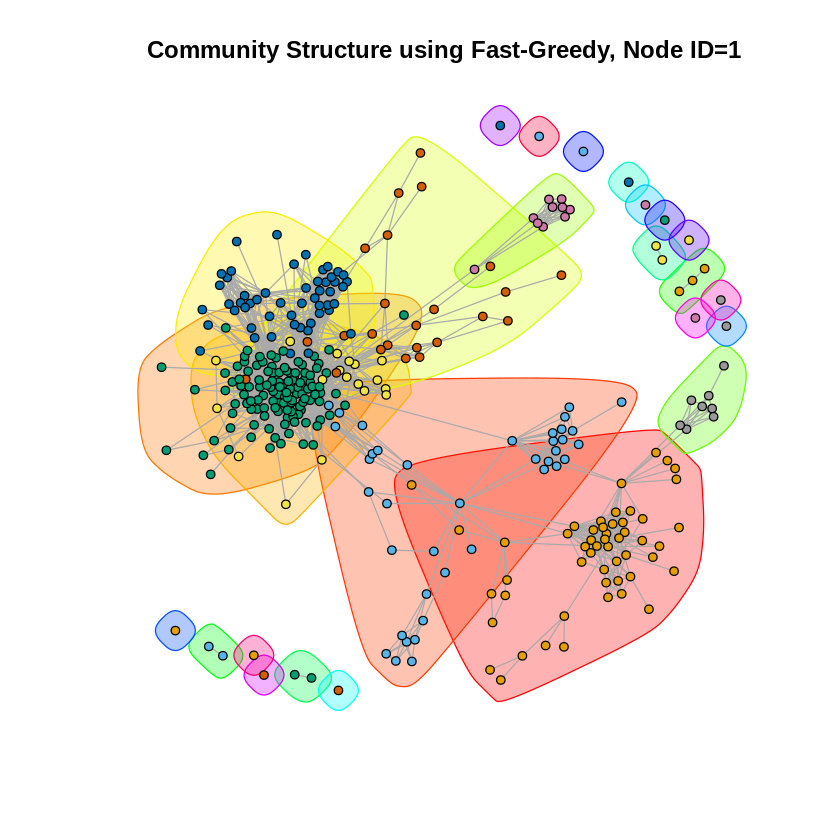

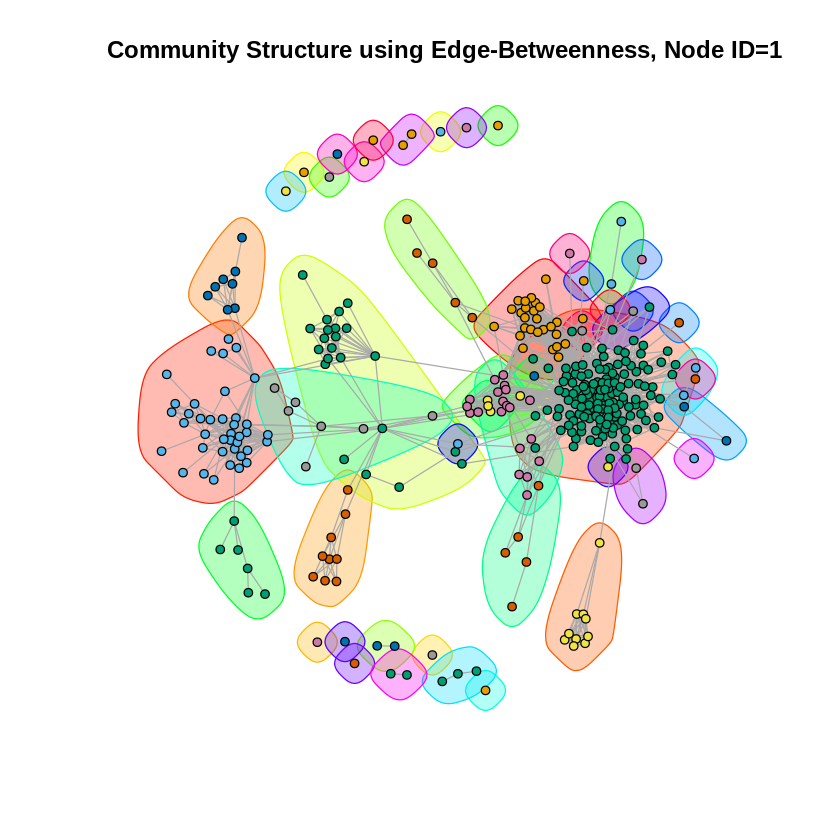

[1] "Node ID is: 2"
[1] "Fast-Greedy Modularity: 0.458127093719977"
[1] "Edge-Betweenness Modularity: 0.521321576382217"
[1] "Infomap Modularity: 0.520960829417416"


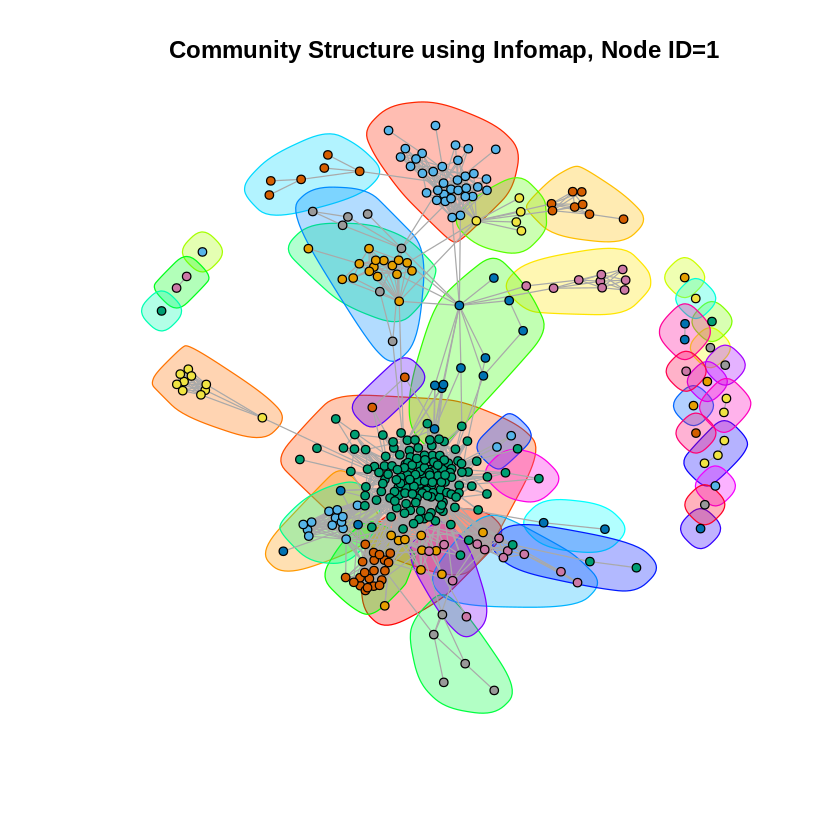

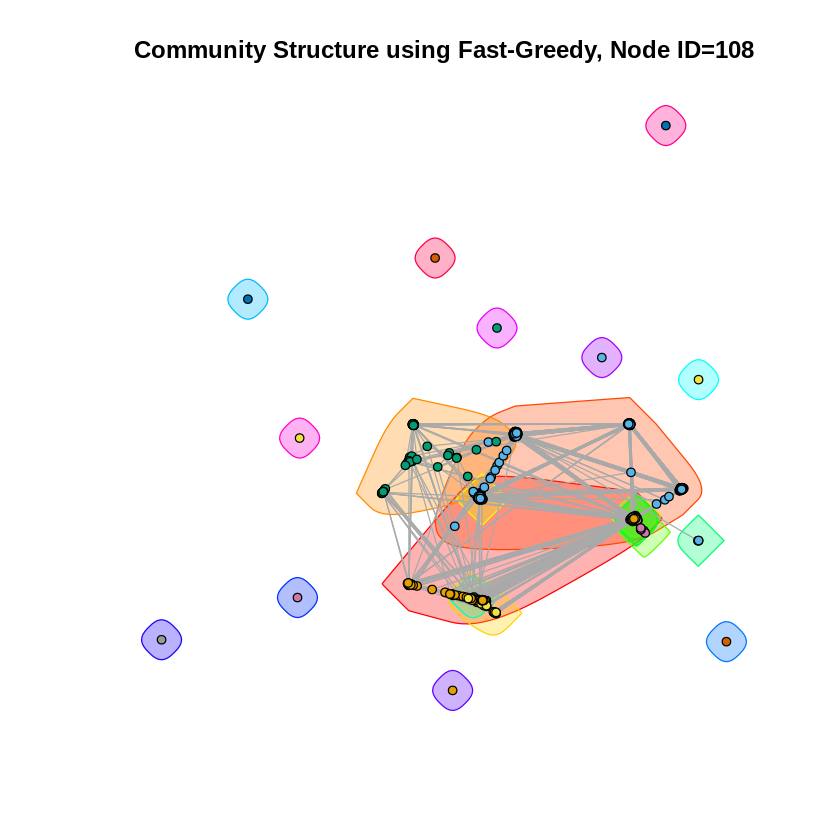

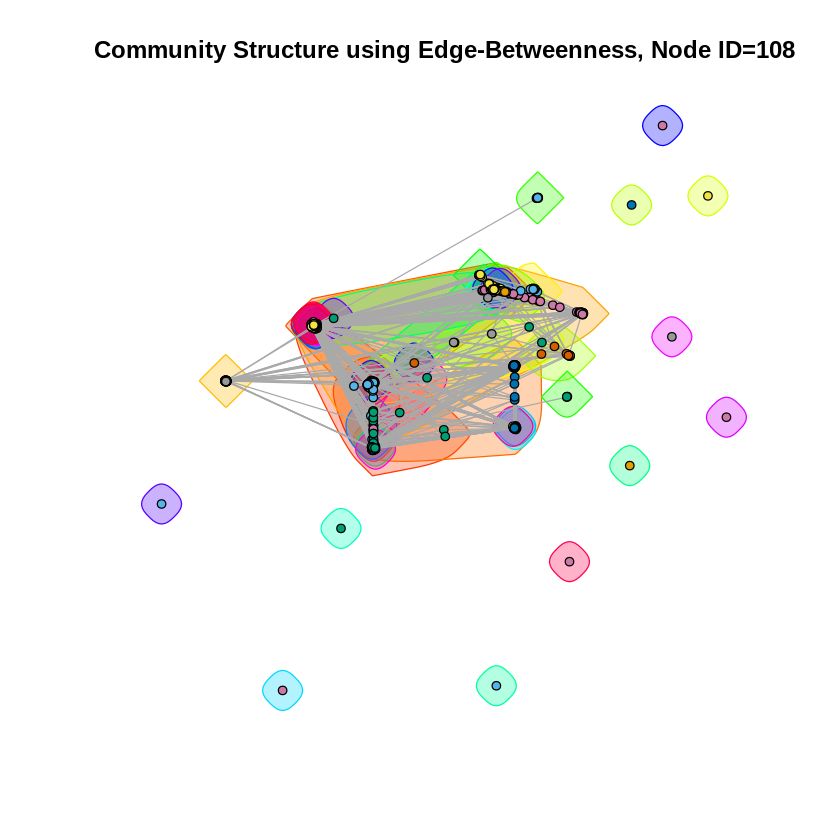

[1] "Node ID is: 3"
[1] "Fast-Greedy Modularity: 0.245691795942674"
[1] "Edge-Betweenness Modularity: 0.150566340187559"
[1] "Infomap Modularity: 0.233773198730166"


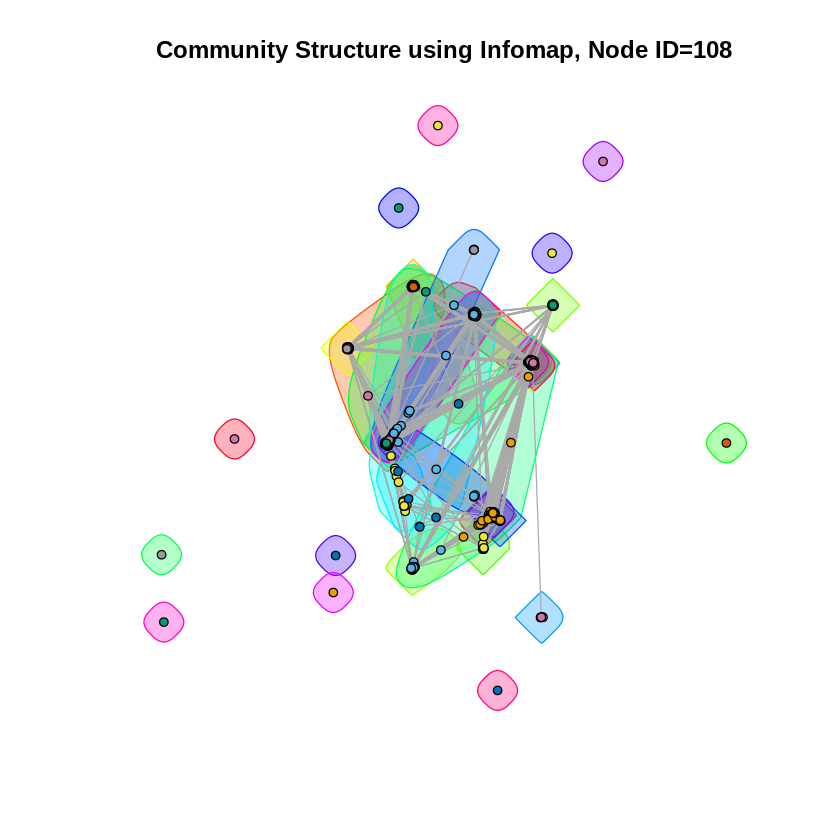

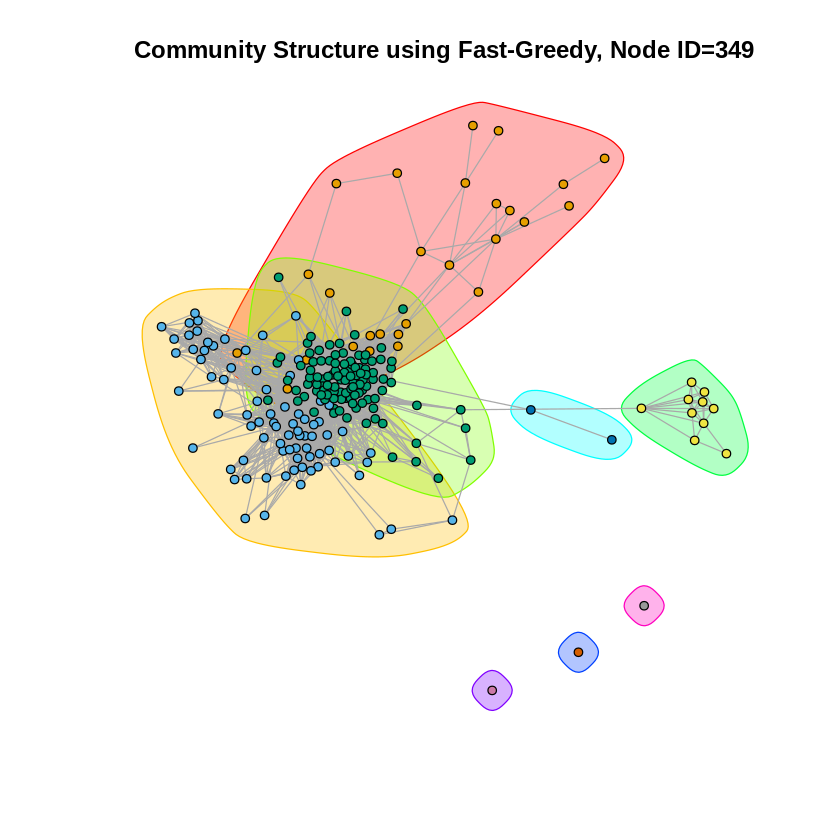

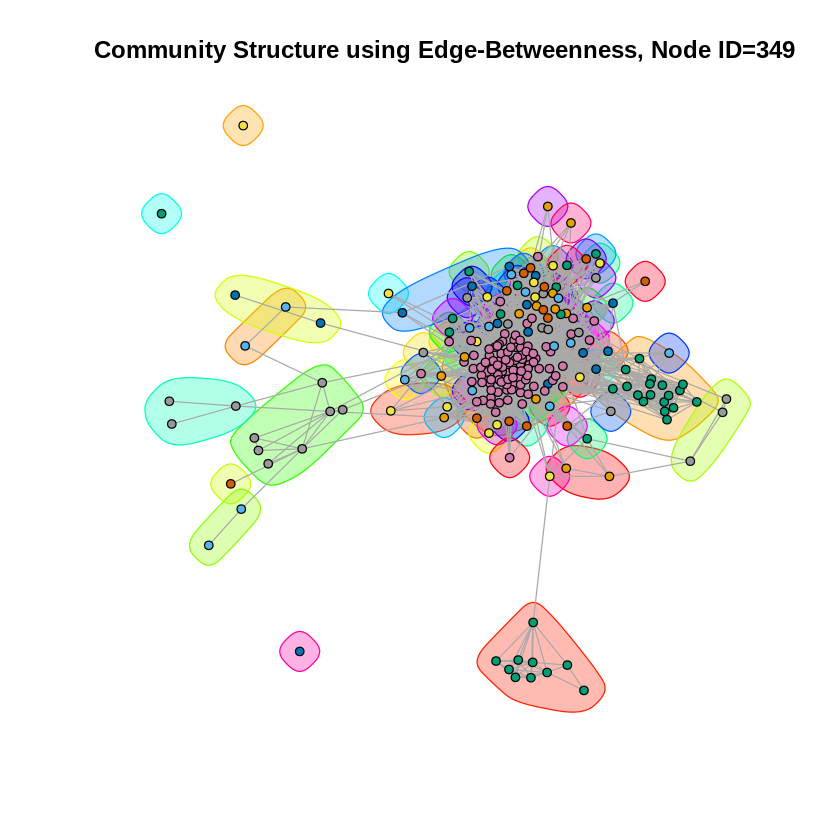

[1] "Node ID is: 4"
[1] "Fast-Greedy Modularity: 0.534214154606172"
[1] "Edge-Betweenness Modularity: 0.515441277123504"
[1] "Infomap Modularity: 0.543443679279522"


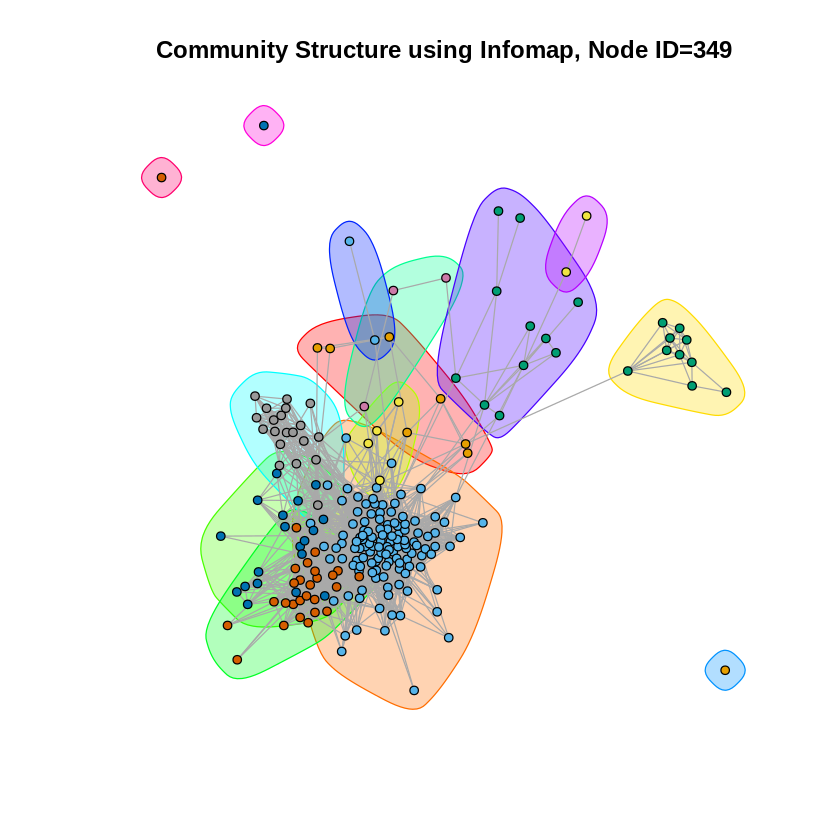

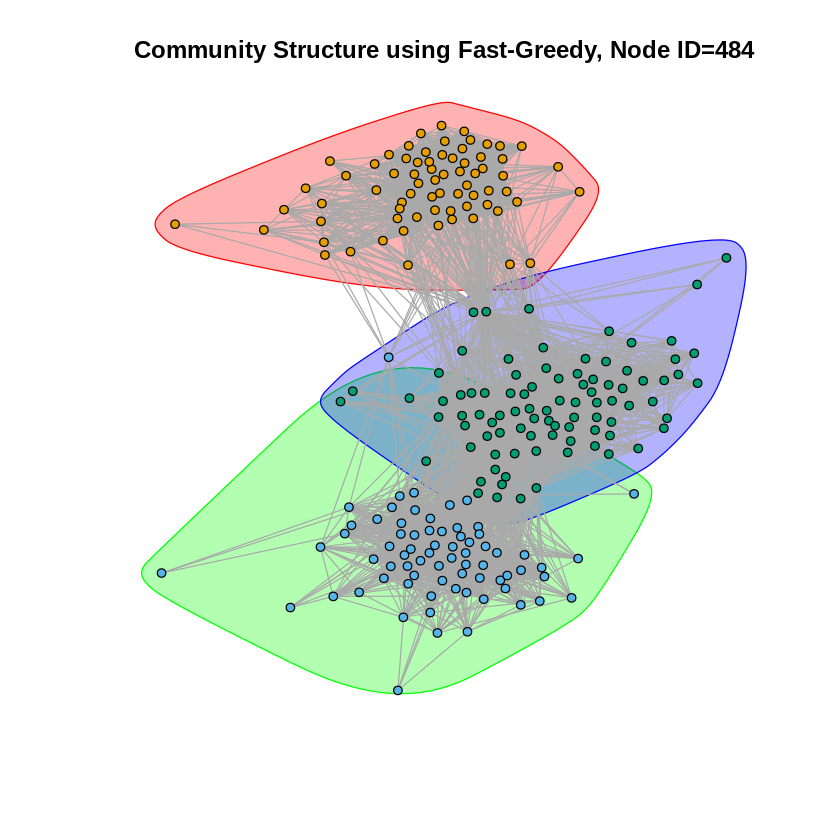

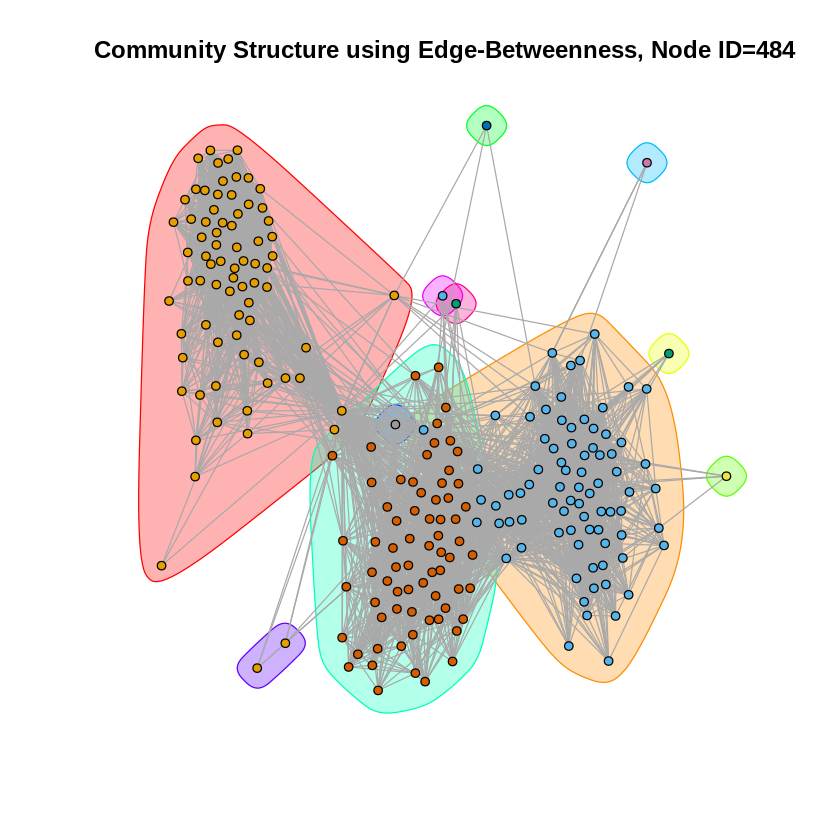

[1] "Node ID is: 5"
[1] "Fast-Greedy Modularity: 0.148195631953499"
[1] "Edge-Betweenness Modularity: 0.0324952980499141"
[1] "Infomap Modularity: 0.0273715944871147"


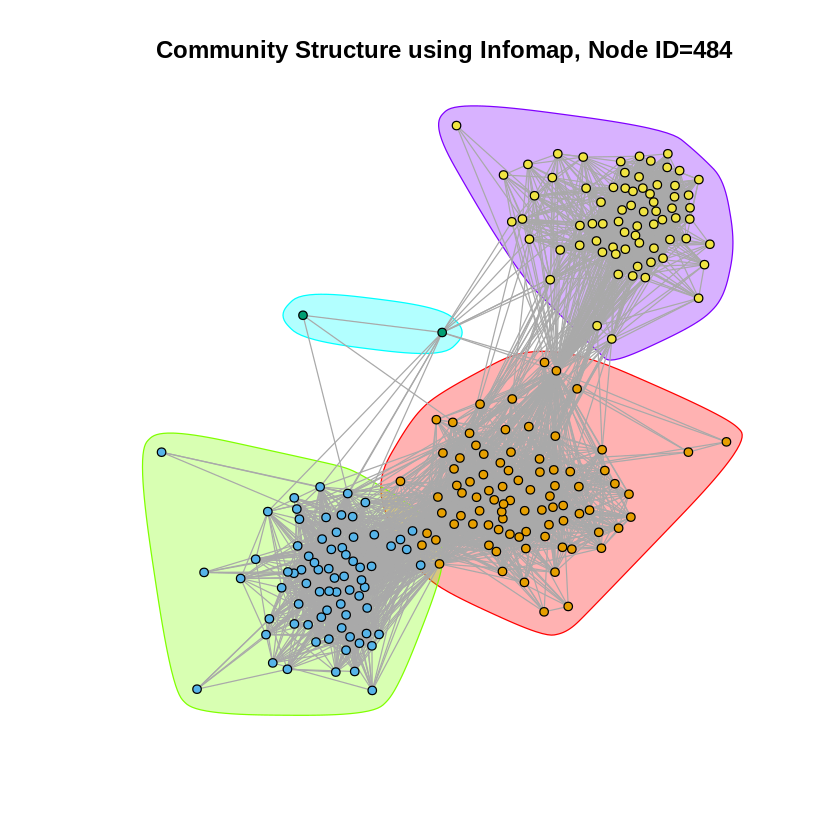

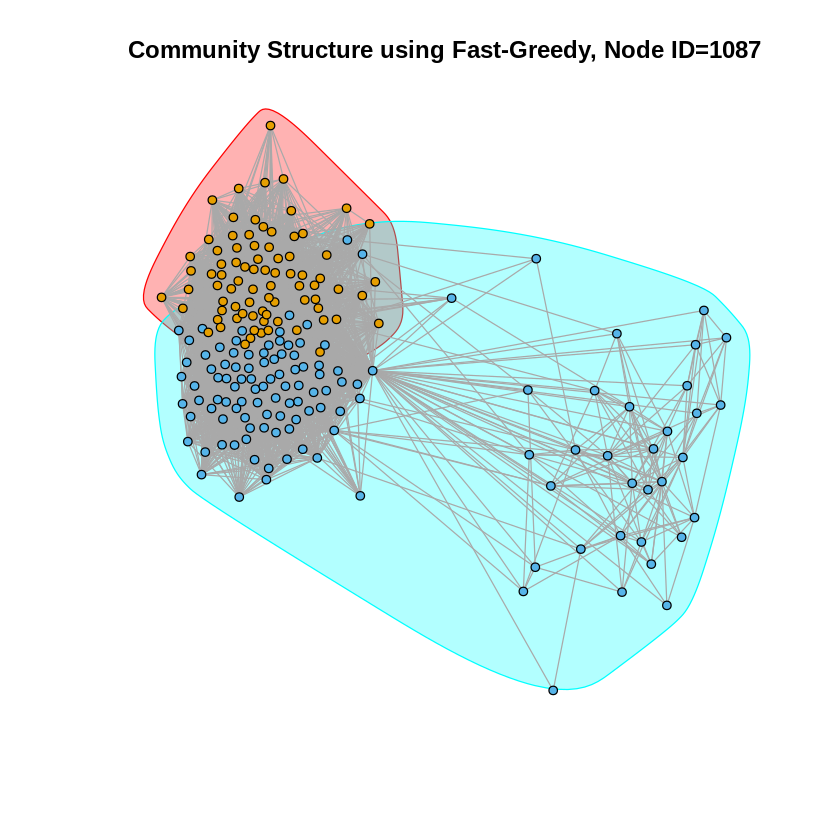

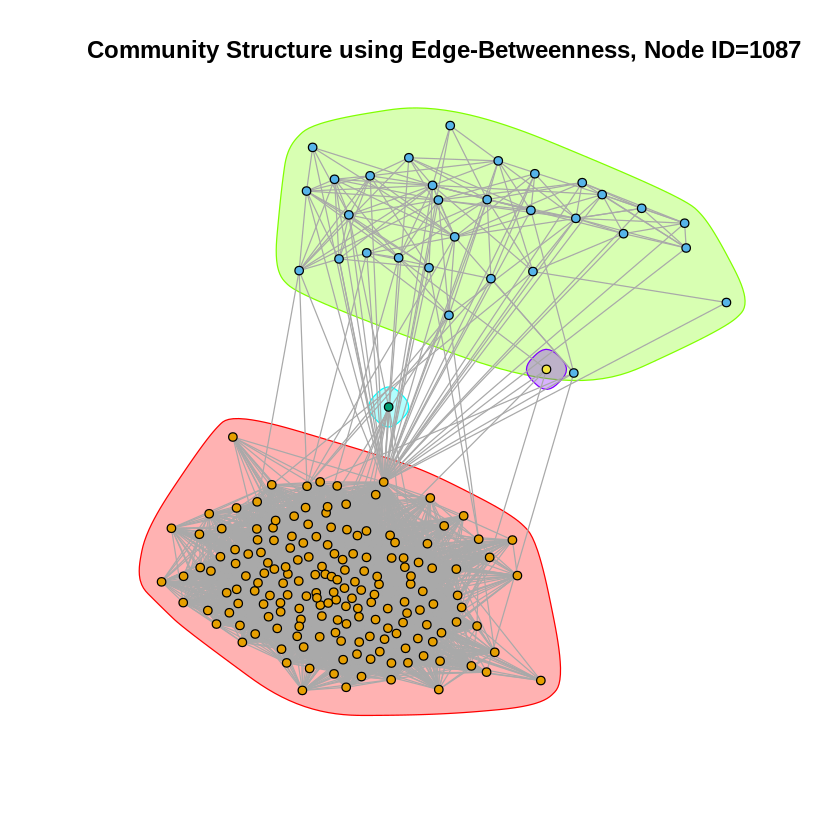

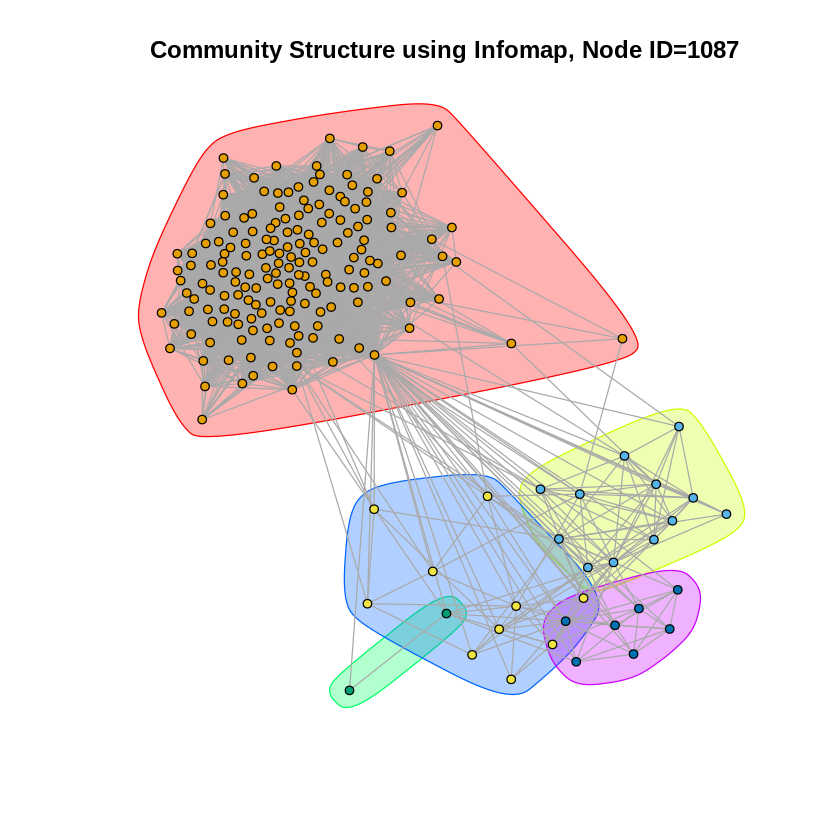

In [ ]:
for (i in 1:5){
  pnc = personalized_networks[[i]]
  fg_communities <- cluster_fast_greedy(pnc)
  eb_communities <- cluster_edge_betweenness(pnc)
  infomap_communities <- cluster_infomap(pnc)

  print(paste("Node ID is:",i))
  fg_modularity <- modularity(fg_communities)
  eb_modularity <- modularity(eb_communities)
  infomap_modularity <- modularity(infomap_communities)

  print(paste("Fast-Greedy Modularity:", fg_modularity))
  print(paste("Edge-Betweenness Modularity:", eb_modularity))
  print(paste("Infomap Modularity:", infomap_modularity))

  plot(fg_communities, pnc, edge.color='darkgrey', vertex.size=3, vertex.label=NA)
  title(sprintf("Community Structure using Fast-Greedy, Node ID=%.0f", idx[i]))

  plot(eb_communities, pnc, edge.color='darkgrey', vertex.size=3, vertex.label=NA)
  title(sprintf("Community Structure using Edge-Betweenness, Node ID=%.0f", idx[i]))

  plot(infomap_communities, pnc, edge.color='darkgrey', vertex.size=3, vertex.label=NA)
  title(sprintf("Community Structure using Infomap, Node ID=%.0f", idx[i]))
}

QUESTION 10: For each of the core node’s personalized network (use same core nodes as Question 9), remove the core node from the personalized network and find the community structure of the modified personalized network. Use the same community detection algorithm as Question 9.
Compare the modularity score of the community structure of the modified personalized network with the modularity score of the community structure of the personalized network of Question 9. For visualization purpose, display the community structure of the modified personalized network using colors. In this question, you should have 15 plots in total.

In [ ]:
for (i in 1:5){
  pnc = personalized_networks[[i]]
  fg_communities <- cluster_fast_greedy(pnc)
  eb_communities <- cluster_edge_betweenness(pnc)
  infomap_communities <- cluster_infomap(pnc)

  print(paste("Node ID is:",i))
  fg_modularity <- modularity(fg_communities)
  eb_modularity <- modularity(eb_communities)
  infomap_modularity <- modularity(infomap_communities)

  print(paste("Fast-Greedy Modularity:", fg_modularity))
  print(paste("Edge-Betweenness Modularity:", eb_modularity))
  print(paste("Infomap Modularity:", infomap_modularity))

  plot(fg_communities, pnc, edge.color='darkgrey', vertex.size=3, vertex.label=NA)
  title(sprintf("Community Structure using Fast-Greedy, Node ID=%.0f", idx[i]))

  plot(eb_communities, pnc, edge.color='darkgrey', vertex.size=3, vertex.label=NA)
  title(sprintf("Community Structure using Edge-Betweenness, Node ID=%.0f", idx[i]))

  plot(infomap_communities, pnc, edge.color='darkgrey', vertex.size=3, vertex.label=NA)
  title(sprintf("Community Structure using Infomap, Node ID=%.0f", idx[i]))
}

QUESTION 11: Write an expression relating the Embeddedness between the core node and a non-core node to the degree of the non-core node in the personalized network of the core node.

QUESTION 12: For each of the core node’s personalized network (use the same core nodes as Question 9), plot the distribution histogram of embeddedness and dispersion. In this question, you will have 10 plots.


Hint Useful function(s): neighbors , intersection , distances